# Gender Recognition by Voice | 04 | Random Forest

In [1]:
import obj
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
sns.set_style('whitegrid')

In [3]:
data_scale = obj.load('var/data_scale')

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data_scale.drop('label',axis=1), data_scale['label'],
                                                    test_size=0.33)

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
error_rate = []
nvals = range(1,601,50)

for i in nvals:
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(X_train,y_train)
    y_pred_i = rfc.predict(X_test)
    error_rate.append(np.mean(y_pred_i != y_test))

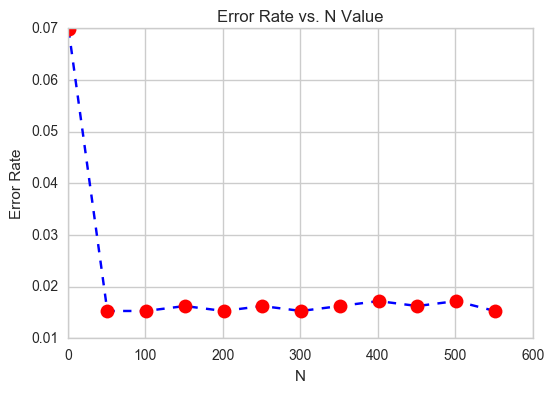

In [11]:
plt.plot(nvals, error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. N Value')
plt.xlabel('N')
plt.ylabel('Error Rate')

In [12]:
nloc = error_rate.index(min(error_rate))
print('Lowest error of %s occurs at n=%s.' % (error_rate[nloc], nvals[nloc]))

Lowest error of 0.0152963671128 occurs at n=51.


In [13]:
rfc = RandomForestClassifier(n_estimators=nvals[nloc])
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\n')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[520  11]
 [  6 509]]


Classification Report:
             precision    recall  f1-score   support

     female       0.99      0.98      0.98       531
       male       0.98      0.99      0.98       515

avg / total       0.98      0.98      0.98      1046

